In [73]:
# import dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


In [32]:
# Import CSV filepath
county_data = pd.read_csv("Resources/county_data.csv")
state_data = pd.read_csv("Resources/state_data.csv")                      

In [33]:
# Call the csv into a panda dataframe
county_data.head()

,fips,state,county,adult_obesity_pct,adult_obesity_z,food_environment_index,food_environment_index_z,exercise_access_pct,exercise_access_z,excess_drinking_pct,...,poor_mental_health_z,dentists_ratio,dentists_num,dentists_rate,exercise_access_pct.1,unemployment_num,unemployment_pct,poor_physical_health_avg_days,housing_inad_facil,housing_overcrowding
0,1000,Alabama,NaN,40.6,NaN,5.4,NaN,61.333795,NaN,14.477526,...,NaN,2016:1,2517.0,49.60294,61.333795,59363.0,2.596766,3.934735,0.856498,1.665074
1,1001,Alabama,Autauga,38.9,0.330217,6.7,0.734845,54.491965,0.326964,15.237822,...,0.779960,3320:1,18.0,30.12099,54.491965,608.0,2.269588,3.910265,1.576994,1.600186
2,1003,Alabama,Baldwin,37.2,-0.043150,7.5,0.055569,63.129350,-0.052993,16.422564,...,0.238446,2124:1,116.0,47.07124,63.129350,2417.0,2.350047,3.730943,0.636564,1.522994
3,1005,Alabama,Barbour,43.4,1.318543,6.0,1.329212,54.854696,0.311008,12.277198,...,1.291158,3088:1,8.0,32.38080,54.854696,335.0,4.065041,5.023488,0.536481,3.755365
4,1007,Alabama,Bibb,39.6,0.483957,7.6,-0.029340,43.390302,0.815326,14.785821,...,0.979416,4401:1,5.0,22.72211,43.390302,219.0,2.509741,4.552795,1.997245,1.239669


In [38]:
# Create a list of column names to filter
columns_to_keep = [
    'adult_obesity_pct', 'adult_obesity_z',
    'food_environment_index', 'food_environment_index_z',
    'exercise_access_pct', 'exercise_access_z', 
    'excess_drinking_pct', 'excess_drinking_z', 
    'uninsured_num', 'uninsured_pct', 'uninsured_z',
    'primary_care_phys_rate', 'primary_care_phys_z',
    'prevent_hospital_rate', 'prevent_hospital_z', 
    'income_inequal_80pct', 'income_inequal_20pct', 
    'income_inequal_ratio', 'income_inequal_z',
    'early_death_count', 'early_death_years_lost', 
    'mental_health_ratio', 'mental_health_rate', 
    'mental_health_num', 'housing_z',
    'unemployment_z', 'physical_inactive_z', 
    'smoking_z', 'dentists_z', 'mental_health_z', 
    'poor_health_z', 'poor_phys_health_z', 
    'poor_mental_health_z', 'dentists_ratio', 
    'dentists_num', 'dentists_rate', 
    'exercise_access_pct.1', 'unemployment_num', 
    'unemployment_pct', 'poor_physical_health_avg_days',
    'housing_inad_facil', 'housing_overcrowding'
]

# Filter the DataFrame
county_filtered = county_data[columns_to_keep]

#filter to only rows with numbers
county_filtered = county_filtered.select_dtypes(include='number')

In [39]:
county_filtered.head()

,adult_obesity_pct,adult_obesity_z,food_environment_index,food_environment_index_z,exercise_access_pct,exercise_access_z,excess_drinking_pct,excess_drinking_z,uninsured_num,uninsured_pct,...,poor_phys_health_z,poor_mental_health_z,dentists_num,dentists_rate,exercise_access_pct.1,unemployment_num,unemployment_pct,poor_physical_health_avg_days,housing_inad_facil,housing_overcrowding
0,40.6,NaN,5.4,NaN,61.333795,NaN,14.477526,NaN,469887.0,11.693351,...,NaN,NaN,2517.0,49.60294,61.333795,59363.0,2.596766,3.934735,0.856498,1.665074
1,38.9,0.330217,6.7,0.734845,54.491965,0.326964,15.237822,-0.614021,4912.0,10.018560,...,0.008903,0.779960,18.0,30.12099,54.491965,608.0,2.269588,3.910265,1.576994,1.600186
2,37.2,-0.043150,7.5,0.055569,63.129350,-0.052993,16.422564,-0.162387,20432.0,10.997067,...,-0.268649,0.238446,116.0,47.07124,63.129350,2417.0,2.350047,3.730943,0.636564,1.522994
3,43.4,1.318543,6.0,1.329212,54.854696,0.311008,12.277198,-1.742638,2150.0,12.677634,...,1.731936,1.291158,8.0,32.38080,54.854696,335.0,4.065041,5.023488,0.536481,3.755365
4,39.6,0.483957,7.6,-0.029340,43.390302,0.815326,14.785821,-0.786328,1905.0,11.379928,...,1.003403,0.979416,5.0,22.72211,43.390302,219.0,2.509741,4.552795,1.997245,1.239669


In [41]:
correlation_county = county_filtered.corr()
correlation_county

,adult_obesity_pct,adult_obesity_z,food_environment_index,food_environment_index_z,exercise_access_pct,exercise_access_z,excess_drinking_pct,excess_drinking_z,uninsured_num,uninsured_pct,...,poor_phys_health_z,poor_mental_health_z,dentists_num,dentists_rate,exercise_access_pct.1,unemployment_num,unemployment_pct,poor_physical_health_avg_days,housing_inad_facil,housing_overcrowding
adult_obesity_pct,1.000000,0.999833,-0.430517,0.458825,-0.399541,0.399415,-0.431951,-0.431022,-0.101501,0.240195,...,0.578498,0.357942,-0.169601,-0.293551,-0.399541,-0.144025,0.201840,0.580083,0.062060,0.047818
adult_obesity_z,0.999833,1.000000,-0.449793,0.458661,-0.402265,0.399485,-0.430674,-0.430761,-0.177738,0.243381,...,0.578491,0.357749,-0.300017,-0.305062,-0.402265,-0.239881,0.205838,0.578194,0.075106,0.052518
food_environment_index,-0.430517,-0.449793,1.000000,-0.989966,0.308492,-0.299783,0.456249,0.475001,-0.005104,-0.439040,...,-0.634368,-0.490428,0.052848,0.161894,0.308492,0.035700,-0.367765,-0.602659,-0.236464,-0.247784
food_environment_index_z,0.458825,0.458661,-0.989966,1.000000,-0.302072,0.297911,-0.483338,-0.483430,-0.055432,0.444141,...,0.642329,0.502386,-0.139456,-0.150319,-0.302072,-0.105823,0.401248,0.640644,0.214847,0.233539
exercise_access_pct,-0.399541,-0.402265,0.308492,-0.302072,1.000000,-1.000000,0.316745,0.324438,0.120937,-0.238572,...,-0.403222,-0.271537,0.167237,0.414205,1.000000,0.154180,-0.054421,-0.389919,-0.086446,-0.021909
exercise_access_z,0.399415,0.399485,-0.299783,0.297911,-1.000000,1.000000,-0.321793,-0.321832,-0.231852,0.232283,...,0.399419,0.269782,-0.302931,-0.400529,-1.000000,-0.274052,0.066623,0.396893,0.085499,0.019406
excess_drinking_pct,-0.431951,-0.430674,0.456249,-0.483338,0.316745,-0.321793,1.000000,0.999995,0.037514,-0.241727,...,-0.666711,-0.571725,0.058124,0.228399,0.316745,0.049879,-0.319072,-0.661556,0.015950,-0.014462
excess_drinking_z,-0.431022,-0.430761,0.475001,-0.483430,0.324438,-0.321832,0.999995,1.000000,0.055203,-0.240929,...,-0.666827,-0.571843,0.085452,0.235414,0.324438,0.064921,-0.321836,-0.664807,0.008574,-0.016026
uninsured_num,-0.101501,-0.177738,-0.005104,-0.055432,0.120937,-0.231852,0.037514,0.055203,1.000000,0.023772,...,-0.105030,-0.061780,0.837088,0.082203,0.120937,0.875717,0.008877,-0.080979,-0.018763,0.071942
uninsured_pct,0.240195,0.243381,-0.439040,0.444141,-0.238572,0.232283,-0.241727,-0.240929,0.023772,1.000000,...,0.363607,0.195308,-0.052129,-0.238565,-0.238572,-0.040443,0.041353,0.363900,0.118796,0.320528


In [46]:
correlation_county.columns

Index(['adult_obesity_pct', 'adult_obesity_z', 'food_environment_index',
       'food_environment_index_z', 'exercise_access_pct', 'exercise_access_z',
       'excess_drinking_pct', 'excess_drinking_z', 'uninsured_num',
       'uninsured_pct', 'uninsured_z', 'primary_care_phys_rate',
       'primary_care_phys_z', 'prevent_hospital_rate', 'prevent_hospital_z',
       'income_inequal_80pct', 'income_inequal_20pct', 'income_inequal_ratio',
       'income_inequal_z', 'early_death_count', 'early_death_years_lost',
       'mental_health_rate', 'mental_health_num', 'housing_z',
       'unemployment_z', 'physical_inactive_z', 'smoking_z', 'dentists_z',
       'mental_health_z', 'poor_health_z', 'poor_phys_health_z',
       'poor_mental_health_z', 'dentists_num', 'dentists_rate',
       'exercise_access_pct.1', 'unemployment_num', 'unemployment_pct',
       'poor_physical_health_avg_days', 'housing_inad_facil',
       'housing_overcrowding'],
      dtype='object')

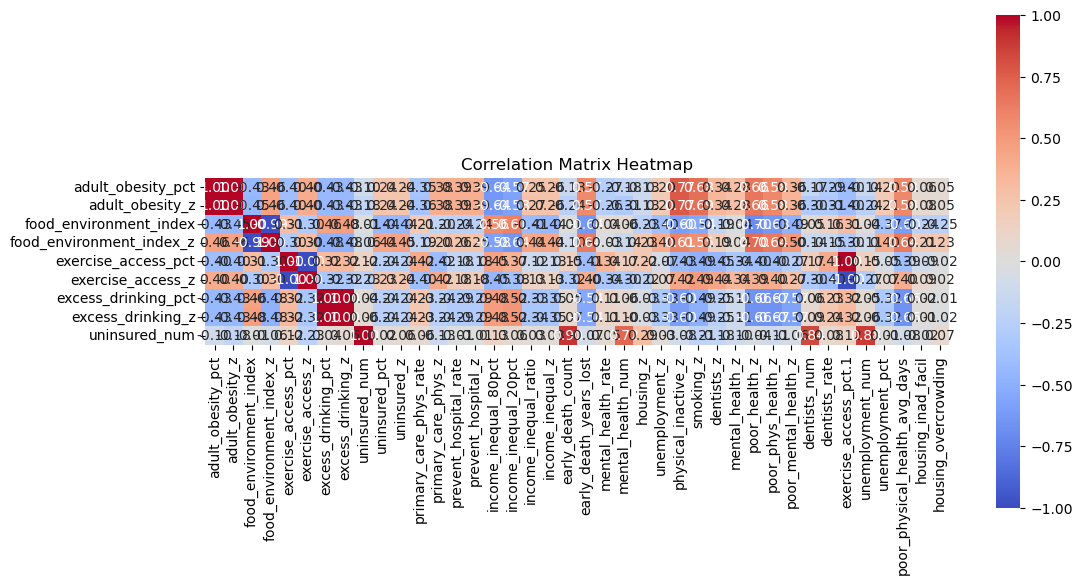

In [168]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

correlation_county1 = correlation_county.loc[['adult_obesity_pct', 'adult_obesity_z', 'food_environment_index',
       'food_environment_index_z', 'exercise_access_pct', 'exercise_access_z',
       'excess_drinking_pct', 'excess_drinking_z', 'uninsured_num']]
# Create a heatmap with color coding
sns.heatmap(correlation_county1, annot=True, fmt=".2f", cmap='coolwarm', 
            vmin=-1, vmax=1, center=0, square=True, cbar_kws={"shrink": .8})

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

# Plots for seeing correlation of measures
## Poor Mental Health and Poor Physical Health vs Early Death Years Lost

# County Scatter Plots


## Mental Health Rate

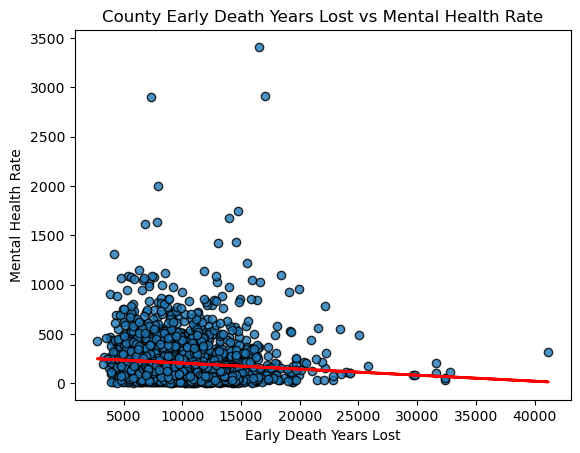

The r^2 value is: 0.009


In [140]:
# County Scatter Plot for Early Death Years Lost vs Mental Health Rate
county_data= county_data.dropna(subset=(["early_death_years_lost","mental_health_rate"])).copy()
x_values = county_data["early_death_years_lost"]
y_values = county_data["mental_health_rate"]

# Set up the scatter plot
plt.scatter(
    x_values,
    y_values,
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate regression values
regression_value = intercept + slope * x_values

# Plot the regression line
plt.plot(x_values, regression_value, color='red', linewidth=2, label='Regression Line')

# Incorporate the other graph properties
plt.title('County Early Death Years Lost vs Mental Health Rate')
plt.xlabel("Early Death Years Lost")
plt.ylabel("Mental Health Rate")


# Show the plot
plt.show()

# Print the r^2 value
print(f'The r^2 value is: {r_value**2:.3f}')



## Mental Health Z

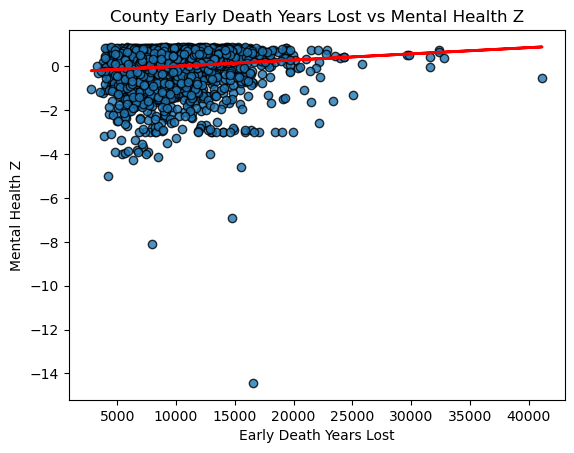

The r^2 value is: 0.012


In [151]:
# County Scatter Plot for Early Death Years Lost vs Mental Health Z
county_data= county_data.dropna(subset=(["early_death_years_lost","mental_health_z"])).copy()
x_values = county_data["early_death_years_lost"]
y_values = county_data["mental_health_z"]

# Set up the scatter plot
plt.scatter(
    x_values,
    y_values,
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate regression values
regression_value = intercept + slope * x_values

# Plot the regression line
plt.plot(x_values, regression_value, color='red', linewidth=2, label='Regression Line')

# Incorporate the other graph properties
plt.title('County Early Death Years Lost vs Mental Health Z')
plt.xlabel("Early Death Years Lost")
plt.ylabel("Mental Health Z")


# Show the plot
plt.show()

# Print the r^2 value
print(f'The r^2 value is: {r_value**2:.3f}')

## Poor Mental Health Z

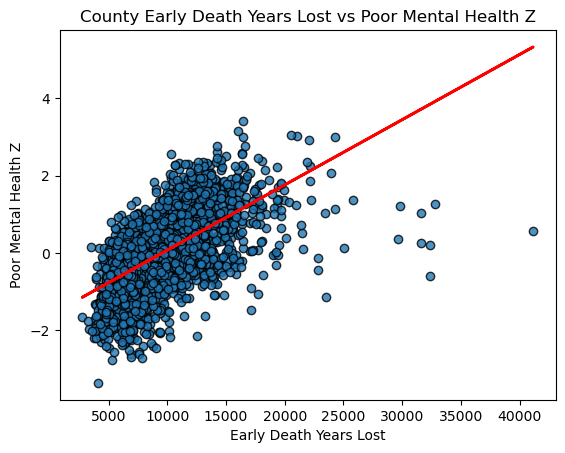

The r^2 value is: 0.355


In [150]:
# County Scatter Plot for Early Death Years Lost vs Poor Mental Health Z
county_data= county_data.dropna(subset=(["early_death_years_lost","poor_mental_health_z"])).copy()
x_values = county_data["early_death_years_lost"]
y_values = county_data["poor_mental_health_z"]

# Set up the scatter plot
plt.scatter(
    x_values,
    y_values,
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate regression values
regression_value = intercept + slope * x_values

# Plot the regression line
plt.plot(x_values, regression_value, color='red', linewidth=2, label='Regression Line')

# Incorporate the other graph properties
plt.title('County Early Death Years Lost vs Poor Mental Health Z')
plt.xlabel("Early Death Years Lost")
plt.ylabel("Poor Mental Health Z")


# Show the plot
plt.show()

# Print the r^2 value
print(f'The r^2 value is: {r_value**2:.3f}')

## Poor Health Z

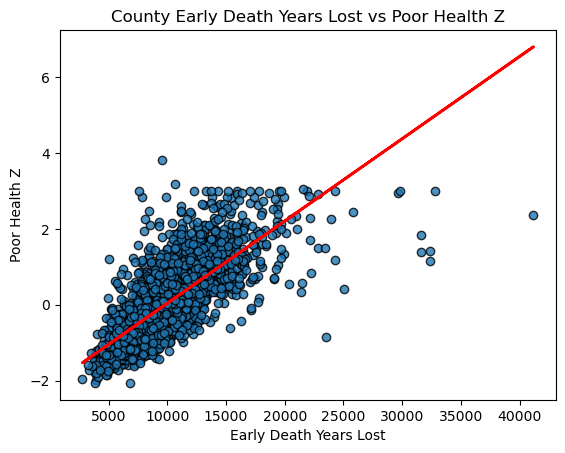

The r^2 value is: 0.572


In [149]:
# County Scatter Plot for Early Death Years Lost vs Poor Health Z
county_data= county_data.dropna(subset=(["early_death_years_lost","poor_health_z"])).copy()
x_values = county_data["early_death_years_lost"]
y_values = county_data["poor_health_z"]

# Set up the scatter plot
plt.scatter(
    x_values,
    y_values,
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate regression values
regression_value = intercept + slope * x_values

# Plot the regression line
plt.plot(x_values, regression_value, color='red', linewidth=2, label='Regression Line')

# Incorporate the other graph properties
plt.title('County Early Death Years Lost vs Poor Health Z')
plt.xlabel("Early Death Years Lost")
plt.ylabel("Poor Health Z")


# Show the plot
plt.show()

# Print the r^2 value
print(f'The r^2 value is: {r_value**2:.3f}')

## Poor Physical Health Z

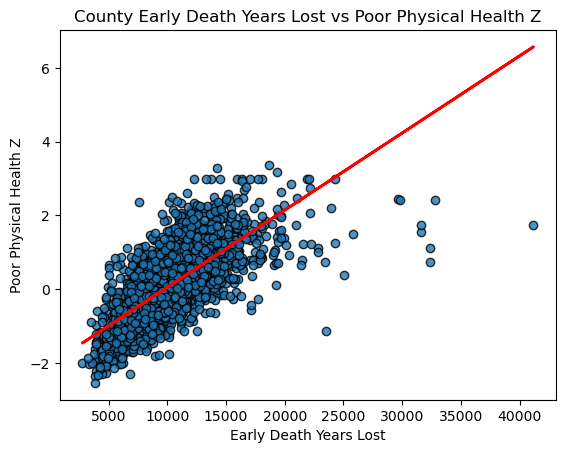

The r^2 value is: 0.525


In [154]:
# County Scatter Plot for Early Death Years Lost vs Poor phys Health Z
county_data= county_data.dropna(subset=(["early_death_years_lost","poor_phys_health_z"])).copy()
x_values = county_data["early_death_years_lost"]
y_values = county_data["poor_phys_health_z"]

# Set up the scatter plot
plt.scatter(
    x_values,
    y_values,
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate regression values
regression_value = intercept + slope * x_values

# Plot the regression line
plt.plot(x_values, regression_value, color='red', linewidth=2, label='Regression Line')

# Incorporate the other graph properties
plt.title('County Early Death Years Lost vs Poor Physical Health Z')
plt.xlabel("Early Death Years Lost")
plt.ylabel("Poor Physical Health Z")


# Show the plot
plt.show()

# Print the r^2 value
print(f'The r^2 value is: {r_value**2:.3f}')

## Poor Physical Health Average Days

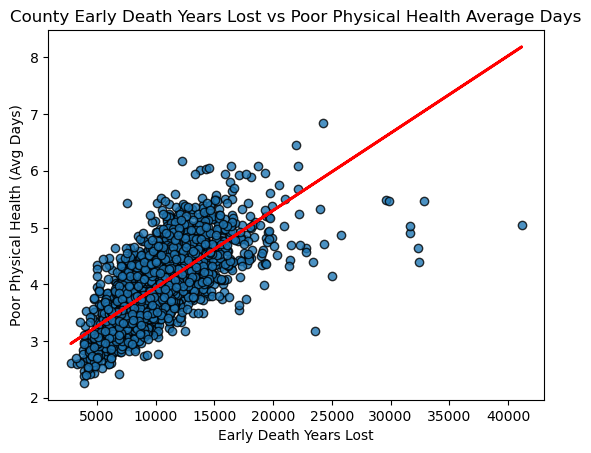

The r^2 value is: 0.526


In [156]:
# County Scatter Plot for Early Death Years Lost vs Poor Physical Health Average Days
county_data= county_data.dropna(subset=(["early_death_years_lost","poor_physical_health_avg_days"])).copy()
x_values = county_data["early_death_years_lost"]
y_values = county_data["poor_physical_health_avg_days"]

# Set up the scatter plot
plt.scatter(
    x_values,
    y_values,
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate regression values
regression_value = intercept + slope * x_values

# Plot the regression line
plt.plot(x_values, regression_value, color='red', linewidth=2, label='Regression Line')

# Incorporate the other graph properties
plt.title('County Early Death Years Lost vs Poor Physical Health Average Days')
plt.xlabel("Early Death Years Lost")
plt.ylabel("Poor Physical Health (Avg Days)")


# Show the plot
plt.show()

# Print the r^2 value
print(f'The r^2 value is: {r_value**2:.3f}')

# State Scatter Plots

## Mental Health Rate

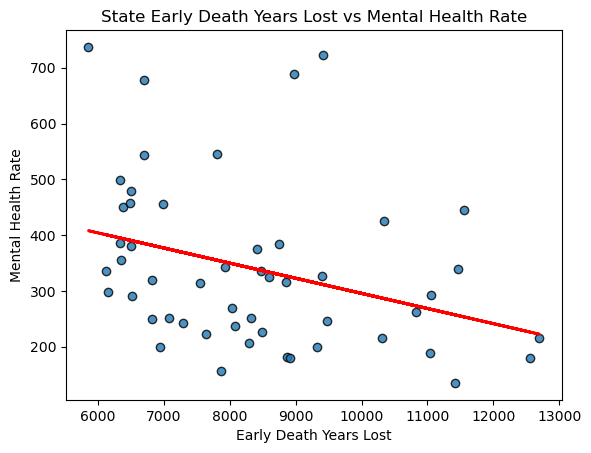

The r^2 value is: 0.111


In [159]:
# State Scatter Plot for Early Death Years Lost vs Mental Health Rate
state_data= state_data.dropna(subset=(["early_death_years_lost","mental_health_rate"])).copy()
x_values = state_data["early_death_years_lost"]
y_values = state_data["mental_health_rate"]

# Set up the scatter plot
plt.scatter(
    x_values,
    y_values,
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate regression values
regression_value = intercept + slope * x_values

# Plot the regression line
plt.plot(x_values, regression_value, color='red', linewidth=2, label='Regression Line')

# Incorporate the other graph properties
plt.title('State Early Death Years Lost vs Mental Health Rate')
plt.xlabel("Early Death Years Lost")
plt.ylabel("Mental Health Rate")


# Show the plot
plt.show()

# Print the r^2 value
print(f'The r^2 value is: {r_value**2:.3f}')

## Poor Physical Health Average Days

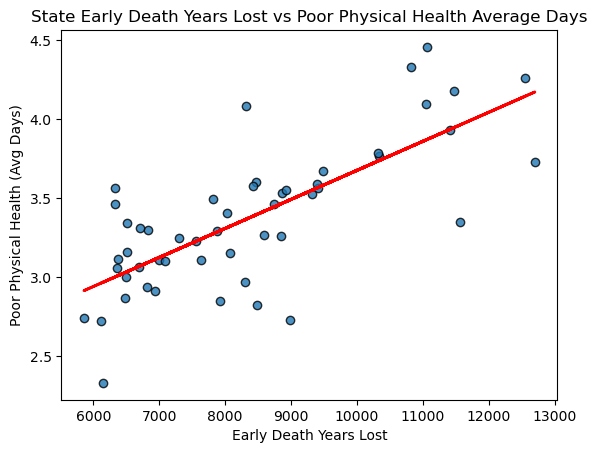

The r^2 value is: 0.543


In [160]:
# State Scatter Plot for Early Death Years Lost vs Poor Physical Health Average Days
state_data= state_data.dropna(subset=(["early_death_years_lost","poor_physical_health_avg_days"])).copy()
x_values = state_data["early_death_years_lost"]
y_values = state_data["poor_physical_health_avg_days"]

# Set up the scatter plot
plt.scatter(
    x_values,
    y_values,
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate regression values
regression_value = intercept + slope * x_values

# Plot the regression line
plt.plot(x_values, regression_value, color='red', linewidth=2, label='Regression Line')

# Incorporate the other graph properties
plt.title('State Early Death Years Lost vs Poor Physical Health Average Days')
plt.xlabel("Early Death Years Lost")
plt.ylabel("Poor Physical Health (Avg Days)")


# Show the plot
plt.show()

# Print the r^2 value
print(f'The r^2 value is: {r_value**2:.3f}')